<a href="https://colab.research.google.com/github/Untick/IrisID_gr1/blob/main/AnastasiaAntimonova/Iris_Antimonova_230605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Инструменты для построения графиков
import matplotlib.pyplot as plt 

# Инструменты для работы с изображениями
from tensorflow.keras.preprocessing import image 

from tensorflow.keras.models import Sequential #Сеть прямого распространения

#Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем для to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений

# Инструменты для работы с массивами
import numpy as np 

# Системные инструменты
import time, random, gdown, os

# Дополнительные инструменты для работы с изображениями
from PIL import Image 

# Дополнительные инструменты визуализации
import seaborn as sns
sns.set_style('darkgrid')


# Отрисовка графиков
import matplotlib.pyplot as plt

# Рисование графиков в ячейках Colab
%matplotlib inline

# Генератор аугментированных изображений
from tensorflow.keras.preprocessing.image import ImageDataGenerator
     

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download('https://drive.google.com/uc?id=16wKj93ooL-mYryWHIDEr49FJAfAFwnRO', None, quiet=True)

'Iris.zip'

In [4]:
# Очистка данных от прошлого запуска (если есть)
!rm -rf {TRAIN_DIR} {TEST_DIR}

# Разархивация датасета
#!unzip -qo "Iris.zip" -d {TRAIN_DIR}
!unzip -q "Iris.zip" -d /content/Iris #Указываем путь к базе в Google Drive

In [5]:
# Глобальные параметры

TRAIN_DIR          = '/content/Iris'        # Папка для обучающего набора данных
TEST_DIR           = '/content/iris_test'   # Папка для тестового набора данных

TEST_SPLIT          = 0.2                  # Доля тестовых данных в общем наборе
VAL_SPLIT           = 0.2                  # Доля проверочной выборки в обучающем наборе

IMG_WIDTH           = 192 # 768                   # Ширина изображения для нейросети
IMG_HEIGHT          = 144 #576                   # Высота изображения для нейросети
IMG_CHANNELS        = 3                     # Количество каналов (для RGB равно 3, для Grey равно 1)



In [6]:
# Создаем папки для каждого класса и перемещаем файлы в соответствующую папку
for i in range(1, 65):
                        class_folder = os.path.join(TRAIN_DIR, f'{i:03}')
                        if not os.path.exists(class_folder):
                            os.makedirs(class_folder)
                        for file_name in ['%03dL_%d.png' % (i, j) for j in range(1, 4)] + ['%03dR_%d.png' % (i, j) for j in range(1, 4)]:
                            file_path = os.path.join(TRAIN_DIR, file_name)
                            if os.path.exists(file_path):
                                os.replace(file_path, os.path.join(class_folder, file_name))
     

In [9]:
#просмотр списка папок
os.listdir(TRAIN_DIR)

['030',
 '014',
 '031',
 '012',
 '040',
 '056',
 '011',
 '032',
 '015',
 '028',
 '061',
 '042',
 '001',
 '046',
 '037',
 '038',
 '004',
 '060',
 '023',
 '018',
 '053',
 '050',
 '008',
 '036',
 '052',
 '027',
 '009',
 '058',
 '047',
 '034',
 '059',
 '019',
 '048',
 '039',
 '017',
 '049',
 '064',
 '022',
 '021',
 '025',
 '020',
 '063',
 '006',
 '013',
 '029',
 '007',
 '051',
 '033',
 '041',
 '055',
 '002',
 '010',
 '024',
 '003',
 '045',
 '054',
 '062',
 '044',
 '005',
 '057',
 '035',
 '043',
 '026',
 '016']

In [7]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(TRAIN_DIR))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 64, метки классов: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064']


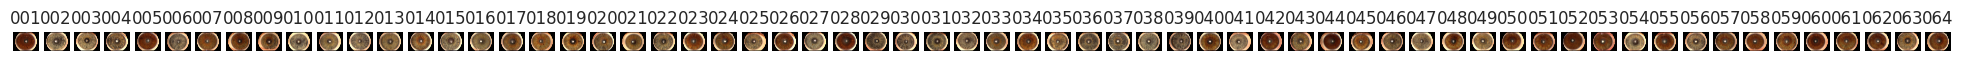

In [10]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    class_path = f'{TRAIN_DIR}/{CLASS_LIST[i]}' 
    # Выбор случайного фото из i-го класса
    img_path = class_path +'/'+random.choice(os.listdir(class_path)) 
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [8]:
# Создание директории тестовых данных
os.mkdir(TEST_DIR)                                        
train_count = 0
test_count = 0

for class_name in CLASS_LIST:                              # Для всех классов по порядку номеров (их меток)
    class_path = f'{TRAIN_DIR}/{class_name}'              # Формирование полного пути к папке с изображениями класса
    test_path = f'{TEST_DIR}/{class_name}'                # Полный путь для тестовых данных класса
    class_files = os.listdir(class_path)                   # Получение списка имен файлов с изображениями текущего класса
    class_file_count = len(class_files)                    # Получение общего числа файлов класса
    os.mkdir(test_path)                                    # Создание подпапки класса для тестовых данных
    test_file_count = int(class_file_count * TEST_SPLIT)   # Определение числа тестовых файлов для класса
    test_files = class_files[-test_file_count:]            # Выделение файлов для теста от конца списка
    for f in test_files:                                   # Перемещение тестовых файлов в папку для теста
        os.rename(f'{class_path}/{f}', f'{test_path}/{f}')
    train_count += class_file_count                        # Увеличение общего счетчика файлов обучающего набора
    test_count += test_file_count                          # Увеличение общего счетчика файлов тестового набора

    print(f'Размер класса {class_name}: {class_file_count} фото, для теста выделено файлов: {test_file_count}')

print(f'Общий размер базы: {train_count}, выделено для обучения: {train_count - test_count}, для теста: {test_count}')

Размер класса 001: 6 фото, для теста выделено файлов: 1
Размер класса 002: 6 фото, для теста выделено файлов: 1
Размер класса 003: 6 фото, для теста выделено файлов: 1
Размер класса 004: 6 фото, для теста выделено файлов: 1
Размер класса 005: 6 фото, для теста выделено файлов: 1
Размер класса 006: 6 фото, для теста выделено файлов: 1
Размер класса 007: 6 фото, для теста выделено файлов: 1
Размер класса 008: 6 фото, для теста выделено файлов: 1
Размер класса 009: 6 фото, для теста выделено файлов: 1
Размер класса 010: 6 фото, для теста выделено файлов: 1
Размер класса 011: 6 фото, для теста выделено файлов: 1
Размер класса 012: 6 фото, для теста выделено файлов: 1
Размер класса 013: 6 фото, для теста выделено файлов: 1
Размер класса 014: 6 фото, для теста выделено файлов: 1
Размер класса 015: 6 фото, для теста выделено файлов: 1
Размер класса 016: 6 фото, для теста выделено файлов: 1
Размер класса 017: 6 фото, для теста выделено файлов: 1
Размер класса 018: 6 фото, для теста выделено фа

#Аугментация данных

In [18]:
# Параметры аугментации и модели
ROTATION_RANGE      = 5                     # Пределы поворота
WIDTH_SHIFT_RANGE   = 0.1                  # Пределы сдвига по горизонтали
HEIGHT_SHIFT_RANGE  = 0.1                  # Пределы сдвига по вертикали
ZOOM_RANGE          = 0.1                  # Пределы увеличения/уменьшения
BRIGHTNESS_RANGE    = (0.8, 1.2)            # Пределы изменения яркости
HORIZONTAL_FLIP     = False                 # Горизонтальное отражение запрещено

BATCH_SIZE          = 8                     # Размер батча
EPOCHS              = 250                   # Эпох обучения
OPTIMIZER           = Adam(0.001)           # Оптимизатор


In [20]:
# Нормализация и аугментация обучающих данных. Разделение выборки на обучающую и проверочную 

train_datagen = ImageDataGenerator(
                    rescale=1. / 255.,
                    rotation_range=ROTATION_RANGE,
                    width_shift_range=WIDTH_SHIFT_RANGE,
                    height_shift_range=HEIGHT_SHIFT_RANGE,
                    zoom_range=ZOOM_RANGE,
                    brightness_range=BRIGHTNESS_RANGE,
                    horizontal_flip=HORIZONTAL_FLIP,
                    validation_split=VAL_SPLIT
                )

In [21]:
# Нормализация тестовых изображений
test_datagen = ImageDataGenerator(
                   rescale=1. / 255.
                )
     

In [22]:
# Создание обучающей выборки
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, 
    subset='training'
)

# Создание проверочной выборки
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

# Тестовая выборка генерируется из папки тестового набора
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=test_count,
    class_mode='categorical',
    shuffle=True,
)

Found 256 images belonging to 64 classes.
Found 64 images belonging to 64 classes.
Found 64 images belonging to 64 classes.


In [16]:
# Проверка формы данных
print(f'Формы данных тренировочной выборки: {train_generator[0][0].shape}, {train_generator[0][1].shape}, батчей: {len(train_generator)}')
print(f'Формы данных   проверочной выборки: {validation_generator[0][0].shape}, {validation_generator[0][1].shape}, батчей: {len(validation_generator)}')
print(f'Формы данных      тестовой выборки: {test_generator[0][0].shape}, {test_generator[0][1].shape}, батчей: {len(test_generator)}')

print()

# Проверка назначения меток классов
print(f'Метки классов тренировочной выборки: {train_generator.class_indices}')
print(f'Метки классов   проверочной выборки: {validation_generator.class_indices}')
print(f'Метки классов      тестовой выборки: {test_generator.class_indices}')

Формы данных тренировочной выборки: (8, 144, 192, 3), (8, 64), батчей: 32
Формы данных   проверочной выборки: (8, 144, 192, 3), (8, 64), батчей: 8
Формы данных      тестовой выборки: (64, 144, 192, 3), (64, 64), батчей: 1

Метки классов тренировочной выборки: {'001': 0, '002': 1, '003': 2, '004': 3, '005': 4, '006': 5, '007': 6, '008': 7, '009': 8, '010': 9, '011': 10, '012': 11, '013': 12, '014': 13, '015': 14, '016': 15, '017': 16, '018': 17, '019': 18, '020': 19, '021': 20, '022': 21, '023': 22, '024': 23, '025': 24, '026': 25, '027': 26, '028': 27, '029': 28, '030': 29, '031': 30, '032': 31, '033': 32, '034': 33, '035': 34, '036': 35, '037': 36, '038': 37, '039': 38, '040': 39, '041': 40, '042': 41, '043': 42, '044': 43, '045': 44, '046': 45, '047': 46, '048': 47, '049': 48, '050': 49, '051': 50, '052': 51, '053': 52, '054': 53, '055': 54, '056': 55, '057': 56, '058': 57, '059': 58, '060': 59, '061': 60, '062': 61, '063': 62, '064': 63}
Метки классов   проверочной выборки: {'001': 

In [23]:
# Функция рисования образцов изображений из заданной выборки

def show_batch(batch,                # батч с примерами
               img_range=range(20),  # диапазон номеров картинок
               figsize=(25, 6),      # размер полотна для рисования одной строки таблицы
               columns=5             # число колонок в таблице
               ):

    for i in img_range:
        ix = i % columns
        if ix == 0:
            fig, ax = plt.subplots(1, columns, figsize=figsize)
        class_label = np.argmax(batch[1][i])
        ax[ix].set_title(CLASS_LIST[class_label])
        ax[ix].imshow(batch[0][i])  
        ax[ix].axis('off')
        plt.tight_layout()

    plt.show()
     

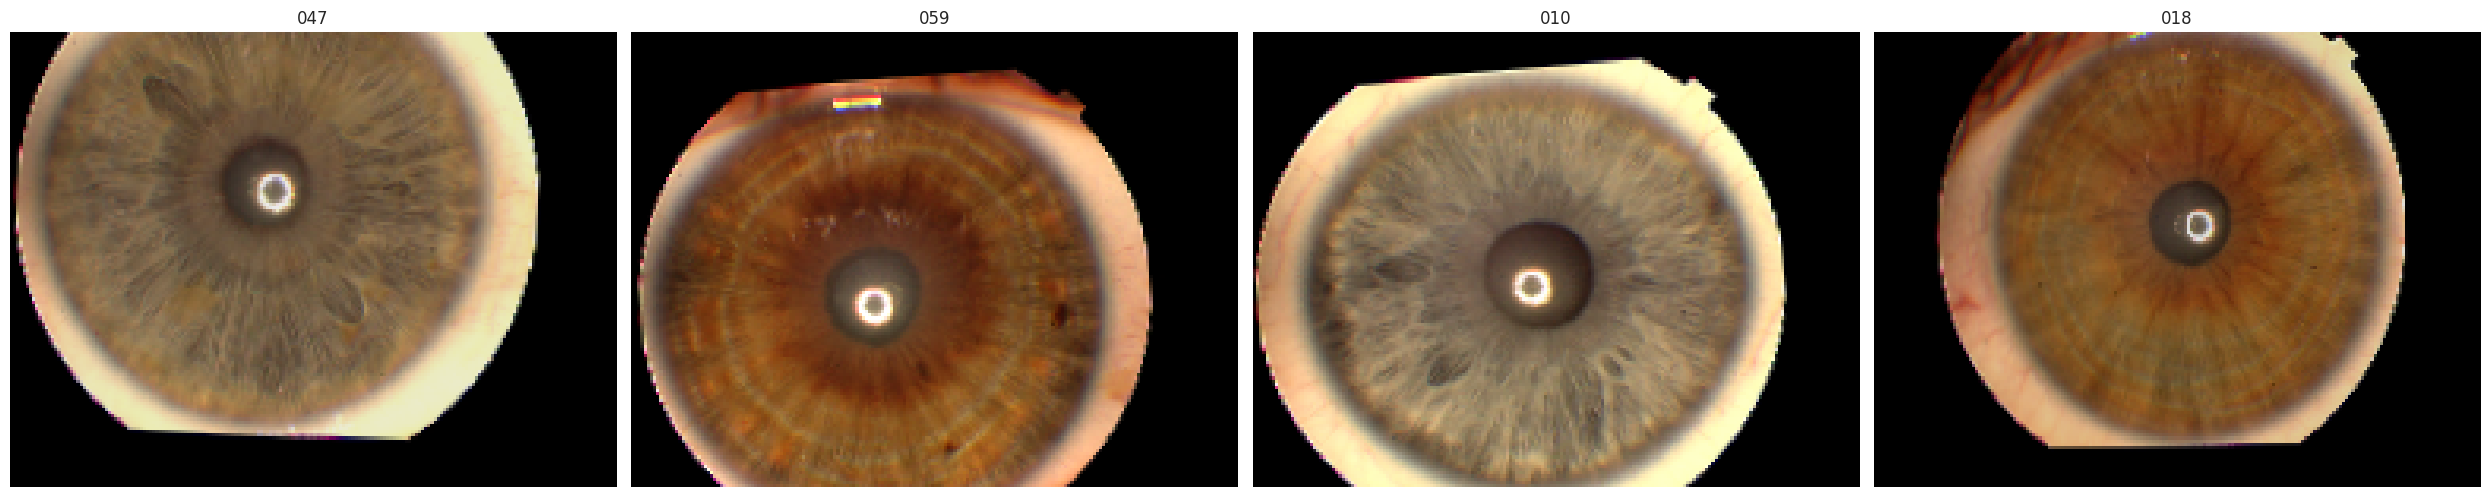

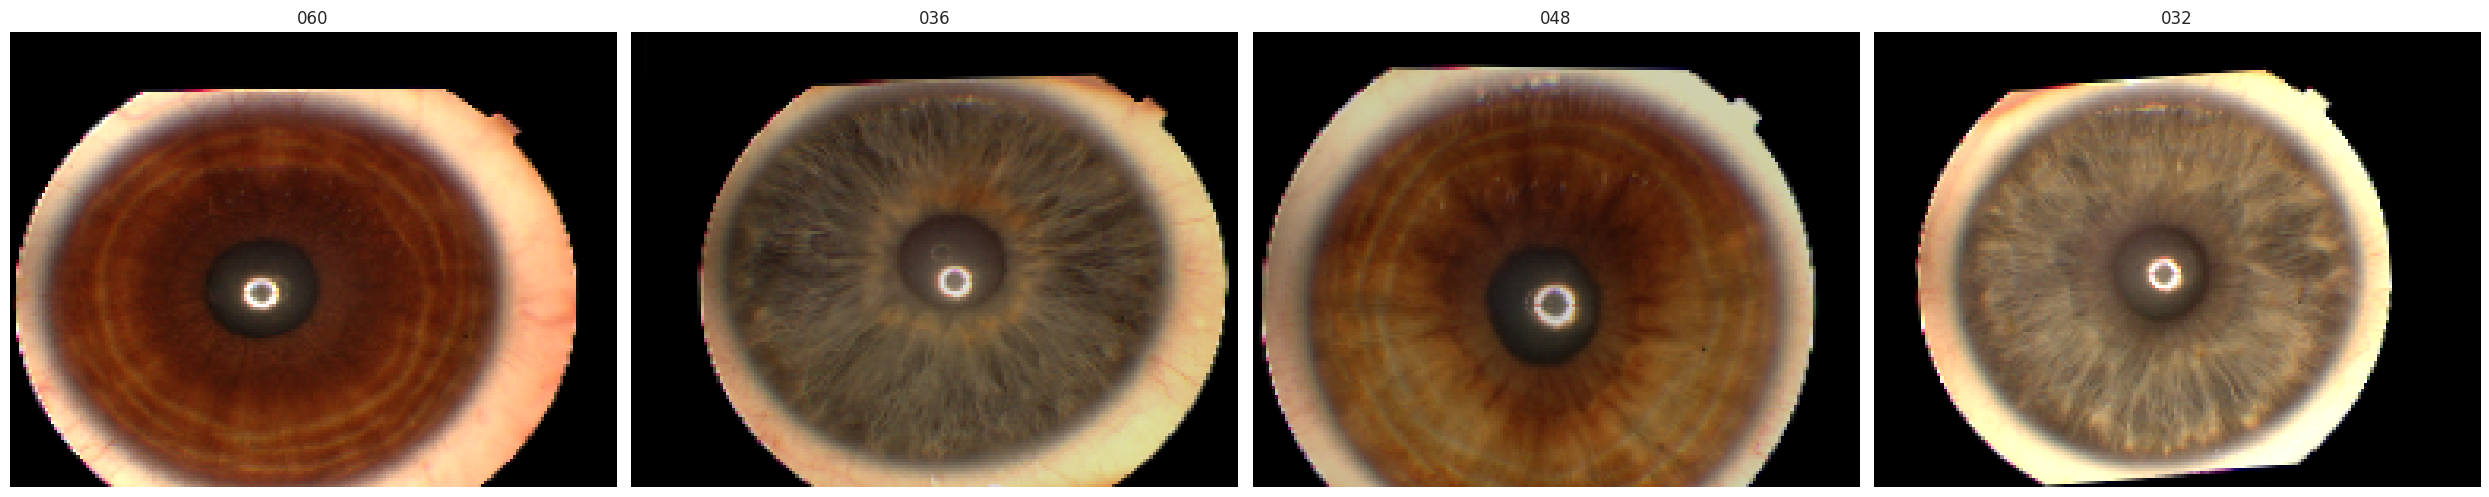

In [24]:
# Вывод примеров из 0-го батча train_generator
show_batch(train_generator[0], range(8), columns = 4)   


In [25]:
# Функция компиляции и обучения модели нейронной сети

def compile_train_model(model,                  # модель нейронной сети
                        train_data,             # обучающие данные
                        val_data,               # проверочные данные
                        optimizer=OPTIMIZER,    # оптимизатор
                        epochs=EPOCHS,          # количество эпох обучения
                        batch_size=BATCH_SIZE,  # размер батча
                        figsize=(20, 5)):       # размер полотна для графиков

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Обучение модели с заданными параметрами
    history = model.fit(train_data,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_data)

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

In [26]:
# Функция обучения и оценки модели нейронной сети

def compile_train_eval_model(model,                    # модель нейронной сети
                             train_data,               # обучающие данные
                             val_data,                 # проверочные данные
                             test_data,                # тестовые данные
                             class_labels=CLASS_LIST,  # список меток классов
                             title='',                 # название модели
                             optimizer=OPTIMIZER,      # оптимизатор
                             epochs=EPOCHS,            # количество эпох обучения
                             batch_size=BATCH_SIZE,    # размер батча
                             graph_size=(20, 5),       # размер полотна для графиков обучения
                             cm_size=(10, 10)          # размер полотна для матрицы ошибок
                             ):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        train_data,
                        val_data,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    

In [27]:
# Создание последовательной модели
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
model.add(BatchNormalization())

# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Четвертый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))

# Пятый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())

# Слой преобразования многомерных данных в одномерные 
model.add(Flatten())

# Промежуточный полносвязный слой
model.add(Dense(512, activation='relu'))


# Промежуточный полносвязный слой
model.add(Dense(1024, activation='relu'))


# Выходной полносвязный слой с количеством нейронов по количесту классов
model.add(Dense(CLASS_COUNT, activation='softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 192, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 144, 192, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 192, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 64, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 64, 64)       2

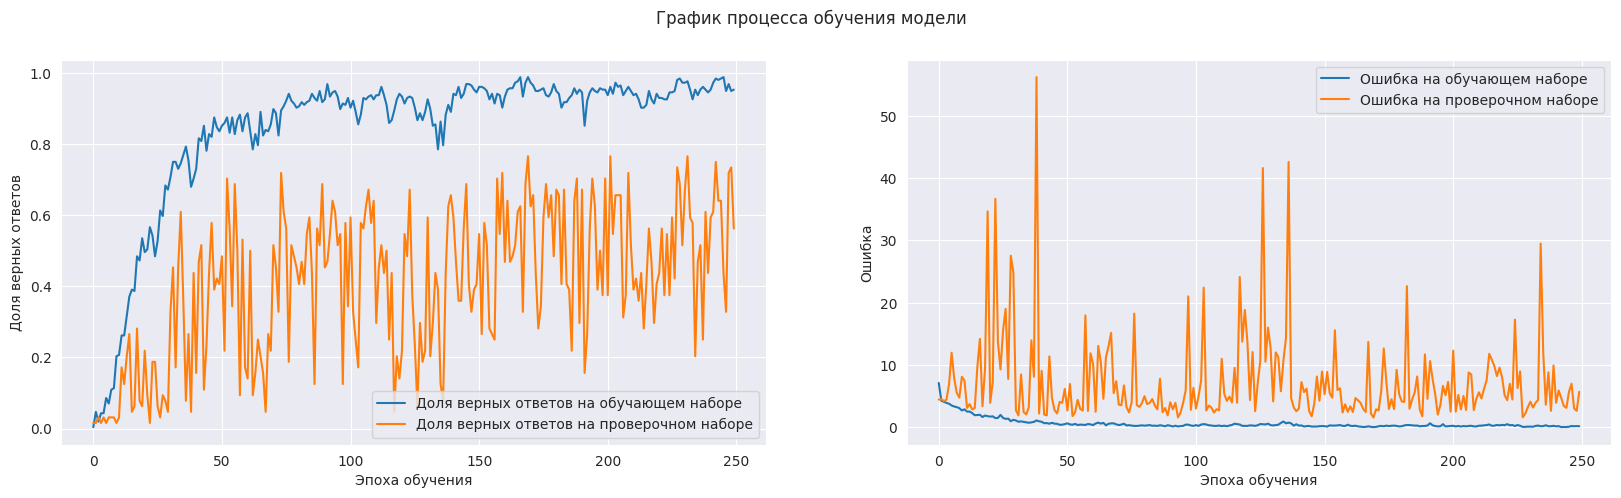

In [28]:
# Обучение модели и вывод оценки ее работы на тестовых данных
compile_train_eval_model(model,
                         train_generator,
                         validation_generator,
                         test_generator,
                         class_labels=CLASS_LIST,
                         )
     